In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn imbalanced-learn
!pip install requests
!pip install xgboost



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import requests
import seaborn as sns
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as Naive_Bayes
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier
import joblib
from IPython.display import display

 

In [3]:
url_string="https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
url_content=requests.get(url_string).content
with open('data.csv','wb')as data_file:
    data_file.write(url_content)

In [4]:
df=pd.read_csv('data.csv')

In [5]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [7]:
print("number of features",df.shape[1])
print("number of instances",df.shape[0] )

number of features 24
number of instances 195


In [8]:
df.drop(['name'], axis=1 ,inplace=True)

In [9]:
print("number of features", df.shape[1])
print("number of instances",df.shape[0])

number of features 23
number of instances 195


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

In [11]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [12]:
df['status']=df['status'].astype('uint8')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    uint8  
 1

In [14]:
print("duplicated rows:",df.duplicated().sum())

duplicated rows: 0


In [15]:
df.isnull().sum()


MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

<Axes: xlabel='status', ylabel='count'>

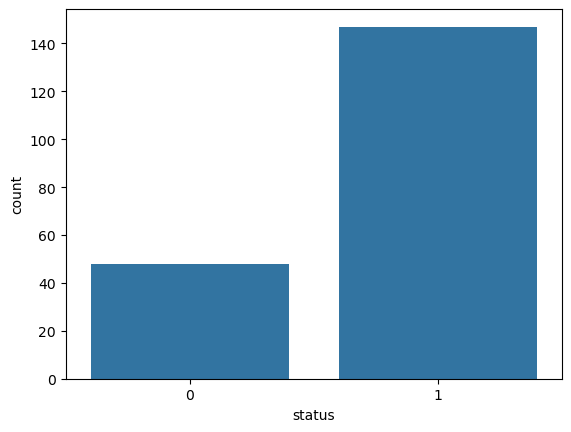

In [16]:

sns.countplot(x='status',data=df)

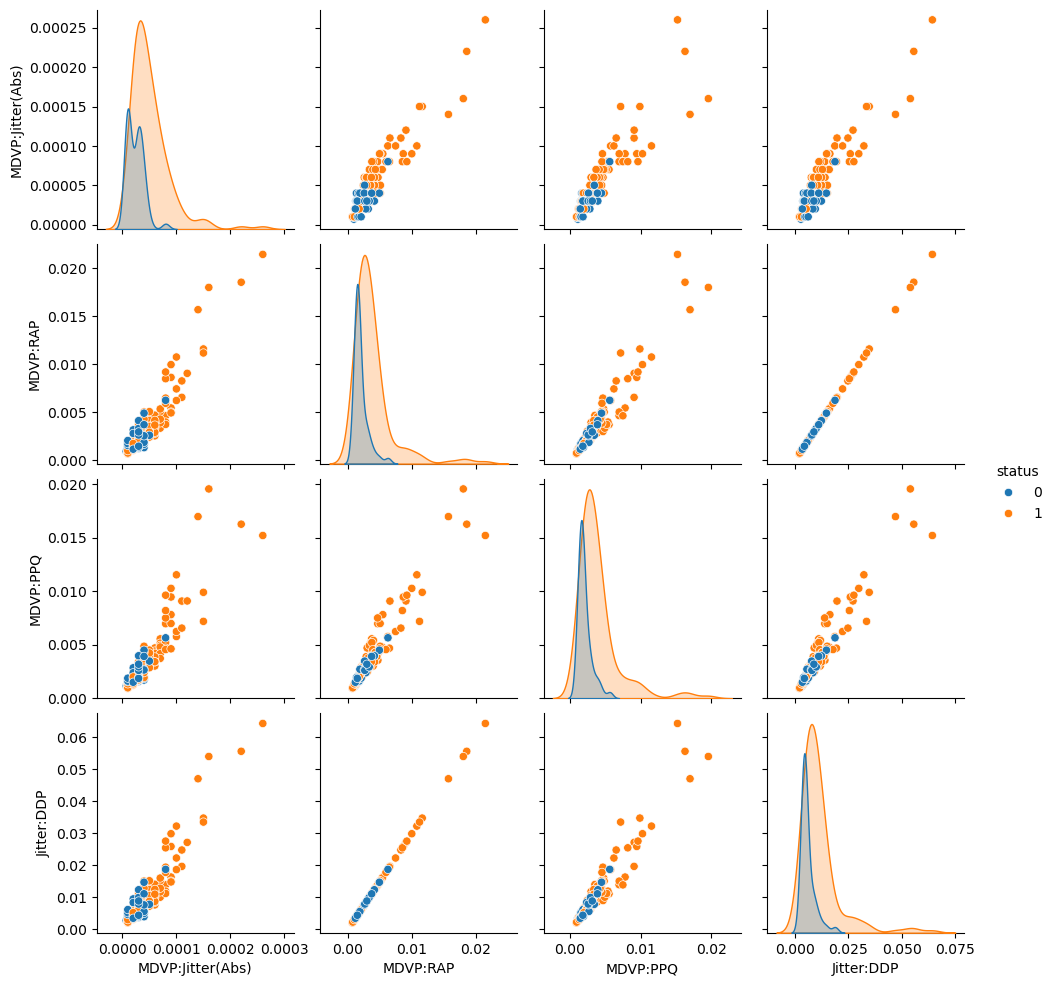

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df=pd.read_csv('data.csv')
df.columns

plt.rcParams['figure.figsize']=(15,4)
sns.pairplot(df,hue='status', vars=['MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP'])
plt.show()

In [18]:
df['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [19]:
# extracting features into features and target

X=df.drop(['status'],axis=1)
y=df['status']
print('feature (x) shape before balancing',X.shape)
print('target (y) shape before balancing ',y.shape)


feature (x) shape before balancing (195, 23)
target (y) shape before balancing  (195,)


In [20]:
sm=SMOTE(random_state=300)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [21]:
# resampling data
X_numeric = X.select_dtypes(include=['int64', 'float64'])
X, y = sm.fit_resample(X_numeric, y)

# X,y=sm.fit_resample(X,y)


In [22]:
print('feature X shape after balancing',X.shape)
print('feature y shape after balancing',y.shape)

feature X shape after balancing (294, 22)
feature y shape after balancing (294,)


In [23]:
# scaling feature between -1 and 1
scalar=MinMaxScaler((-1,1))

In [24]:
x_features=scalar.fit_transform(X)
Y_labels=y

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_features,Y_labels,test_size=0.2,random_state=20)

Decision Tree Classifier

In [26]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
# print(classification_report(y_test,pred))
print(classification_report(y_test, pred, zero_division=0))


              precision    recall  f1-score   support

           0       0.94      0.88      0.91        33
           1       0.86      0.92      0.89        26

    accuracy                           0.90        59
   macro avg       0.90      0.90      0.90        59
weighted avg       0.90      0.90      0.90        59



In [27]:
param_grid={
    'max_features':['auto','sqrt','log2'],
    'max_depth':range(1,10),'random_state':range(30,210,30),
    'criterion':['gini','entropy']
}
CV_dt=GridSearchCV(estimator=clf,param_grid=param_grid,cv=5)
CV_dt.fit(X_train, y_train)



c:\Users\dp580\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\dp580\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dp580\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users\dp580\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'random_state': range(30, 210, 30)})

In [28]:
CV_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'sqrt',
 'random_state': 120}

In [29]:
dt1=DecisionTreeClassifier(random_state=120,max_features='sqrt',max_depth=6,criterion='entropy')
dt1.fit(X_train,y_train)
pred=dt1.predict(X_test)
# print(classification_report(y_test,pred))
print(classification_report(y_test, pred, zero_division=0))


              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.96      0.88      0.92        26

    accuracy                           0.93        59
   macro avg       0.94      0.93      0.93        59
weighted avg       0.93      0.93      0.93        59



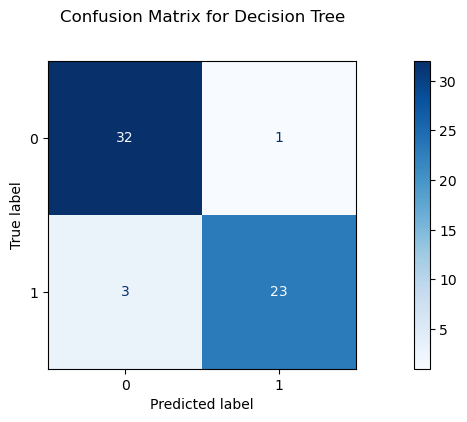

In [30]:

# from sklearn.metrics import ConfusionMatrixDisplay
# import matplotlib.pyplot as plt

# plot
disp = ConfusionMatrixDisplay.from_estimator(
    dt1, X_test, y_test,
    cmap=plt.cm.Blues
)

plt.title('Confusion Matrix for Decision Tree', y=1.1)
plt.show()


In [31]:
# dumping decision tree classifier
joblib.dump(dt1,'dt1_clf.pkl')

['dt1_clf.pkl']

Random Forest Classifier

In [32]:
# random forest classifier
rfc1=RandomForestClassifier()
rfc1.fit(X_train,y_train)
pred=rfc1.predict(X_test)
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.89      0.97      0.93        33
           1       0.96      0.85      0.90        26

    accuracy                           0.92        59
   macro avg       0.92      0.91      0.91        59
weighted avg       0.92      0.92      0.91        59



In [33]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10],
    'criterion': ['gini']
}

CV_rfc = GridSearchCV(estimator=rfc1, param_grid=param_grid, cv=5)

CV_rfc.fit(X_train, y_train)

print("Best params:", CV_rfc.best_params_)
print("Best score:", CV_rfc.best_score_)

Best params: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 200}
Best score: 0.9404255319148938


In [34]:
joblib.dump(rfc1,'rf_clf.pkl')

['rf_clf.pkl']

Logistic regression

In [35]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
predlog=logmodel.predict(X_test)


In [36]:
print(classification_report(y_test,predlog))
print("confusion_matrix")
confusion_matrix(y_test,predlog)

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        33
           1       0.90      0.69      0.78        26

    accuracy                           0.83        59
   macro avg       0.85      0.82      0.82        59
weighted avg       0.84      0.83      0.83        59

confusion_matrix


array([[31,  2],
       [ 8, 18]])

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

param_grid = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__penalty': ['l2'],
    'model__solver': ['lbfgs'],
    'model__max_iter': [100, 200, 500]
}

grid_search = GridSearchCV(pipeline, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
print("Test Accuracy:", best_model.score(X_test, y_test))


Best Hyperparameters: {'model__C': 10, 'model__max_iter': 100, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
Best CV Score: 0.851063829787234
Test Accuracy: 0.8305084745762712


In [40]:
joblib.dump(logmodel,'predlog_clf.pkl')

['predlog_clf.pkl']

Support Vector Machine

In [41]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)
print(classification_report(y_test, svm.predict(X_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.78      0.97      0.86        33
           1       0.94      0.65      0.77        26

    accuracy                           0.83        59
   macro avg       0.86      0.81      0.82        59
weighted avg       0.85      0.83      0.82        59



In [42]:
svm = SVC(probability=True)  # probability=True for predict_proba if needed

svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],  # gamma only for rbf/poly
    'degree': [2, 3, 4]         # degree only used with polynomial kernel
}

svm_grid = GridSearchCV(estimator=svm, param_grid=svm_param_grid, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)

print("SVM Best Params:", svm_grid.best_params_)
print("SVM Best CV Score:", svm_grid.best_score_)

best_svm = svm_grid.best_estimator_
svm_pred = best_svm.predict(X_test)

print("SVM Test Report:\n", classification_report(y_test, svm_pred, zero_division=0))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))


SVM Best Params: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Best CV Score: 0.9531914893617021
SVM Test Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.96      0.98        26

    accuracy                           0.98        59
   macro avg       0.99      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59

SVM Confusion Matrix:
 [[33  0]
 [ 1 25]]


XG Boost classifier

In [43]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)
print(classification_report(y_test, xgb.predict(X_test), zero_division=0))


              precision    recall  f1-score   support

           0       0.97      0.91      0.94        33
           1       0.89      0.96      0.93        26

    accuracy                           0.93        59
   macro avg       0.93      0.94      0.93        59
weighted avg       0.93      0.93      0.93        59



In [ ]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV

# xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)

# xgb_param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0]
# }

# xgb_grid = GridSearchCV(estimator=xgb, param_grid=xgb_param_grid, cv=5, scoring='accuracy')

# xgb_grid.fit(X_train, y_train)

# print("XGBoost Best Params:", xgb_grid.best_params_)
# print("XGBoost Best CV Score:", xgb_grid.best_score_)

# best_xgb = xgb_grid.best_estimator_
# xgb_pred = best_xgb.predict(X_test)

# print("XGBoost Classification Report:")
# print(classification_report(y_test, xgb_pred, zero_division=0))

# print("XGBoost Confusion Matrix:")
# print(confusion_matrix(y_test, xgb_pred))


c:\Users\dp580\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\dp580\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\dp580\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\dp580\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

XGBoost Best Params: {'colsample_bytree': 0.6, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.6}
XGBoost Best CV Score: 0.948936170212766
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       0.96      0.92      0.94        26

    accuracy                           0.95        59
   macro avg       0.95      0.95      0.95        59
weighted avg       0.95      0.95      0.95        59

XGBoost Confusion Matrix:
[[32  1]
 [ 2 24]]


In [45]:
joblib.dump(xgb,'xgb1_clf.pkl')

['xgb1_clf.pkl']

In [47]:
# 1) REQUIRED IMPORTS
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# 2) XGBOOST MODEL SETUP
xgb = XGBClassifier(
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# 3) HYPERPARAMETER GRID
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# 4) GRID SEARCH SETUP
xgb_grid = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_param_grid,
    cv=5,
    scoring='accuracy',   # ya 'f1' agar imbalance zyada hai
    n_jobs=-1             # jitne cores available hain use kare
)

# 5) FIT GRID SEARCH ON TRAINING DATA
xgb_grid.fit(X_train, y_train)

# 6) PRINT BEST PARAMETERS + BEST SCORE
print("XGBoost Best Params:", xgb_grid.best_params_)
print("XGBoost Best CV Score:", xgb_grid.best_score_)

# 7) MAKE PREDICTIONS ON TEST DATA
best_xgb = xgb_grid.best_estimator_
xgb_pred = best_xgb.predict(X_test)

# 8) EVALUATION METRICS
print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_pred, zero_division=0))

print("\nXGBoost Confusion Matrix:")
print(confusion_matrix(y_test, xgb_pred))


XGBoost Best Params: {'colsample_bytree': 0.6, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}
XGBoost Best CV Score: 0.948936170212766

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        33
           1       0.89      0.96      0.93        26

    accuracy                           0.93        59
   macro avg       0.93      0.94      0.93        59
weighted avg       0.93      0.93      0.93        59


XGBoost Confusion Matrix:
[[30  3]
 [ 1 25]]


c:\Users\dp580\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:47:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [48]:
joblib.dump(xgb,'xgb1_clf.pkl')

['xgb1_clf.pkl']